In [122]:
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

In [123]:
import pandas as pd

# Load the dataset
file_path = 'clients_data_final_version.csv'
data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the dataset to understand its structure
print(data.head())


        ID  Account_number        Full_Name  Age  Disease/Disability  \
0   R43199             NaN    KIRDI M'hamed   33                   -   
1  R808044             NaN  DJAMILA MERZOUK   44            Arthrite   
2  R884758    6.172781e+13  SOFIANE BELHADJ   73    Surdité profonde   
3  R177088    9.997001e+13     YOUSFI FETHI   33    Diabète contrôlé   
4  R884783             NaN      LEILA SAIDI   74  Amputation majeure   

         Salary Job Have_other_Credits   Requested_Credit Credit_Type  \
0  84 800,00 DA  PB                 NO    1 351 000,00 DA       RURAL   
1  21 700,00 DA  PR                 NO   21 500 000,00 DA         LSP   
2           NaN   R                 NO    6 500 000,00 DA       RURAL   
3  54 400,00 DA  PR                 NO  500 000 000,00 DA         VSP   
4  53 200,00 DA   R                 NO   10 000 000,00 DA        LSP    

         Date LOAN_APPROVED       Given_credit  
0     2/26/19           YES    1 351 000,00 DA  
1  2021-12-18            NO   

In [124]:
# List columns you consider unnecessary
columns_to_drop = ['ID', 'Account_number', 'Full_Name','Date','Given_credit']

# Drop these columns
data = data.drop(columns=columns_to_drop)

# Display the data to confirm the columns are dropped
print(data.head())



   Age  Disease/Disability        Salary Job Have_other_Credits  \
0   33                   -  84 800,00 DA  PB                 NO   
1   44            Arthrite  21 700,00 DA  PR                 NO   
2   73    Surdité profonde           NaN   R                 NO   
3   33    Diabète contrôlé  54 400,00 DA  PR                 NO   
4   74  Amputation majeure  53 200,00 DA   R                 NO   

    Requested_Credit Credit_Type LOAN_APPROVED  
0    1 351 000,00 DA       RURAL           YES  
1   21 500 000,00 DA         LSP            NO  
2    6 500 000,00 DA       RURAL            NO  
3  500 000 000,00 DA         VSP           YES  
4   10 000 000,00 DA        LSP             NO  


In [125]:
import pandas as pd
import numpy as np

# Function to convert currency formatted strings to float and handle non-numeric placeholders
def currency_to_float(x):
    if isinstance(x, str):
        # Remove the 'DA', strip whitespace, remove thousands separator, and take the part before the comma
        x = x.replace('DA', '').strip().split(',')[0].replace(' ', '')
        # Return the result as float
        if x not in ['', '-', 'NA']:
            amount = float(x)
            # If the amount is greater than 10,000,000, divide by 100
            if amount > 10000000:
                amount /= 100
            return amount
    return np.nan

# Apply the conversion function to the currency columns
data['Salary'] = data['Salary'].apply(currency_to_float)
data['Requested_Credit'] = data['Requested_Credit'].apply(currency_to_float)

# Convert 'LOAN_APPROVED' from 'YES'/'NO' to 1/0
data['LOAN_APPROVED'] = data['LOAN_APPROVED'].map({'YES': 1, 'NO': 0})
data['Have_other_Credits'] = data['Have_other_Credits'].map({'YES': 1, 'NO': 0})

# Verify the changes by checking data types and displaying the head of the dataset
print(data.dtypes)
print(data.head())


Age                     int64
Disease/Disability     object
Salary                float64
Job                    object
Have_other_Credits      int64
Requested_Credit      float64
Credit_Type            object
LOAN_APPROVED           int64
dtype: object
   Age  Disease/Disability   Salary Job  Have_other_Credits  Requested_Credit  \
0   33                   -  84800.0  PB                   0         1351000.0   
1   44            Arthrite  21700.0  PR                   0          215000.0   
2   73    Surdité profonde      NaN   R                   0         6500000.0   
3   33    Diabète contrôlé  54400.0  PR                   0         5000000.0   
4   74  Amputation majeure  53200.0   R                   0        10000000.0   

  Credit_Type  LOAN_APPROVED  
0       RURAL              1  
1         LSP              0  
2       RURAL              0  
3         VSP              1  
4        LSP               0  


In [126]:
# Assuming your original dataset is named 'original_data'

# Select only the numerical features
numerical_features = ['Age', 'Salary', 'Requested_Credit']

# Calculate the minimum and maximum values for each numerical feature
min_max_values = {}
for feature in numerical_features:
    min_val = data[feature].min()
    max_val = data[feature].max()
    min_max_values[feature] = (min_val, max_val)

# Display the minimum and maximum values for each numerical feature
for feature, (min_val, max_val) in min_max_values.items():
    print(f"Feature: {feature}, Min Value: {min_val}, Max Value: {max_val}")



Feature: Age, Min Value: 23, Max Value: 97
Feature: Salary, Min Value: 15400.0, Max Value: 97800.0
Feature: Requested_Credit, Min Value: 110000.0, Max Value: 23730000.0


In [127]:
# Display missing values per column
print(data.isnull().sum())


# Identify rows with any missing values
rows_with_missing_values = data[data.isnull().any(axis=1)]

# Print rows with missing values
print(rows_with_missing_values)



Age                    0
Disease/Disability     0
Salary                 3
Job                    0
Have_other_Credits     0
Requested_Credit      16
Credit_Type            2
LOAN_APPROVED          0
dtype: int64
     Age                               Disease/Disability   Salary Job  \
2     73                                 Surdité profonde      NaN   R   
36    23                                    Hypothyroïdie  78200.0  PB   
38    59  Maladie pulmonaire obstructive chronique sévère      NaN  PB   
41    48                   Maladie cardiovasculaire grave      NaN  PB   
59    33                                                -  44600.0  PB   
64    46                                                -  60800.0  PB   
72    43                                Surdité partielle  59300.0  PB   
75    49                                Surdité partielle  46000.0  PB   
111   32                                                -  52200.0  PB   
124   30                                       

In [128]:


# Print the number of rows before dropping missing values
print("Number of rows before dropping missing values:", len(data))

# Drop rows with any missing values
data = data.dropna()

# Print the number of rows after dropping missing values
print("Number of rows after dropping missing values:", len(data))

# Optionally, you can also show the remaining data
print(data.head())


Number of rows before dropping missing values: 279
Number of rows after dropping missing values: 260
   Age  Disease/Disability   Salary Job  Have_other_Credits  Requested_Credit  \
0   33                   -  84800.0  PB                   0         1351000.0   
1   44            Arthrite  21700.0  PR                   0          215000.0   
3   33    Diabète contrôlé  54400.0  PR                   0         5000000.0   
4   74  Amputation majeure  53200.0   R                   0        10000000.0   
5   59            Arthrite  58840.0  PR                   1          155000.0   

  Credit_Type  LOAN_APPROVED  
0       RURAL              1  
1         LSP              0  
3         VSP              1  
4        LSP               0  
5         LSP              0  


In [129]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame

# Selecting features to scale
features_to_scale = ['Age', 'Salary', 'Requested_Credit']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Check the transformed data
print(data.head())


        Age  Disease/Disability    Salary Job  Have_other_Credits  \
0 -0.873827                   -  2.474997  PB                   0   
1 -0.288136            Arthrite -1.139105  PR                   0   
3 -0.873827    Diabète contrôlé  0.733813  PR                   0   
4  1.309204  Amputation majeure  0.665082   R                   0   
5  0.510534            Arthrite  0.988117  PR                   1   

   Requested_Credit Credit_Type  LOAN_APPROVED  
0         -0.421860       RURAL              1  
1         -0.738953         LSP              0  
3          0.596690         VSP              1  
4          1.992345        LSP               0  
5         -0.755701         LSP              0  


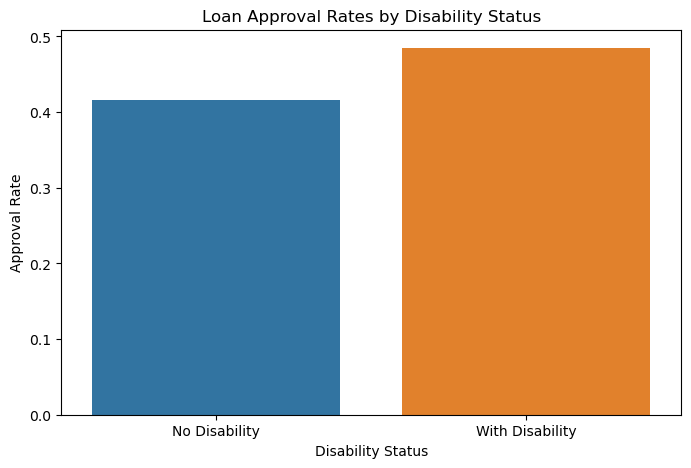

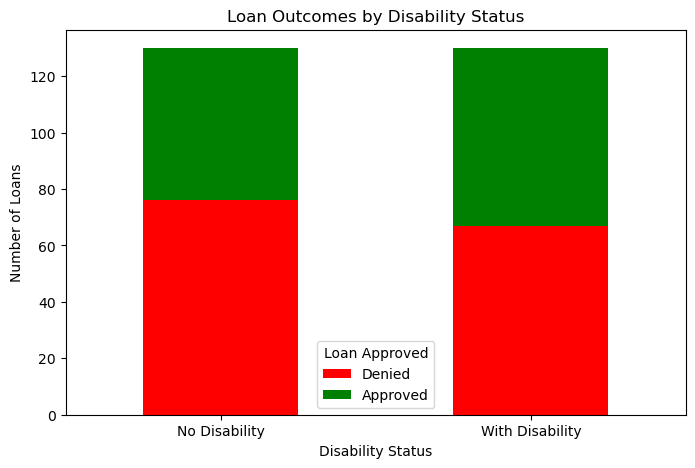

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Categorize 'Disease/Disability' into 'With Disability' if any specific condition is mentioned and 'No Disability' if marked as '-'
data['Disability_Status'] = data['Disease/Disability'].apply(lambda x: 'No Disability' if x == '-' else 'With Disability')

# 1. Bar Chart of Loan Approval Rates by Disease/Disability Status
# Calculate approval rates
approval_rates = data.groupby('Disability_Status')['LOAN_APPROVED'].mean()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=approval_rates.index, y=approval_rates.values)
plt.title('Loan Approval Rates by Disability Status')
plt.ylabel('Approval Rate')
plt.xlabel('Disability Status')
plt.show()

# 2. Stacked Bar Chart of Loan Outcomes
# Creating a crosstab for the stacked bar chart
outcomes = pd.crosstab(data['Disability_Status'], data['LOAN_APPROVED'])

# Plotting
outcomes.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 5))
plt.title('Loan Outcomes by Disability Status')
plt.ylabel('Number of Loans')
plt.xlabel('Disability Status')

# Corrected x-ticks setting
plt.xticks(ticks=[0, 1], labels=['No Disability', 'With Disability'], rotation=0)  # Setting custom labels with corresponding positions

plt.legend(title='Loan Approved', labels=['Denied', 'Approved'])
plt.show()


Loan Approval Rates by Disease/Disability Type:
Amputation majeure: 0.00
Cancer avancé: 0.00
Cécité: 0.00
Sclérose en plaques: 0.00
Quadriplégie: 0.00
Démence avancée: 0.00
Maladie pulmonaire obstructive chronique sévère: 0.00
Surdité profonde: 0.00
Insuffisance rénale chronique: 0.00
Maladie cardiovasculaire grave: 0.00
Maladie de Parkinson avancée: 0.00
Surdité partielle: 0.25
Arthrite: 0.45
Hypothyroïdie: 0.53
Asthme: 0.54
Dyslipidémie: 0.64
Troubles visuels légers: 0.69
Diabète contrôlé: 0.73
Hypertension: 0.78


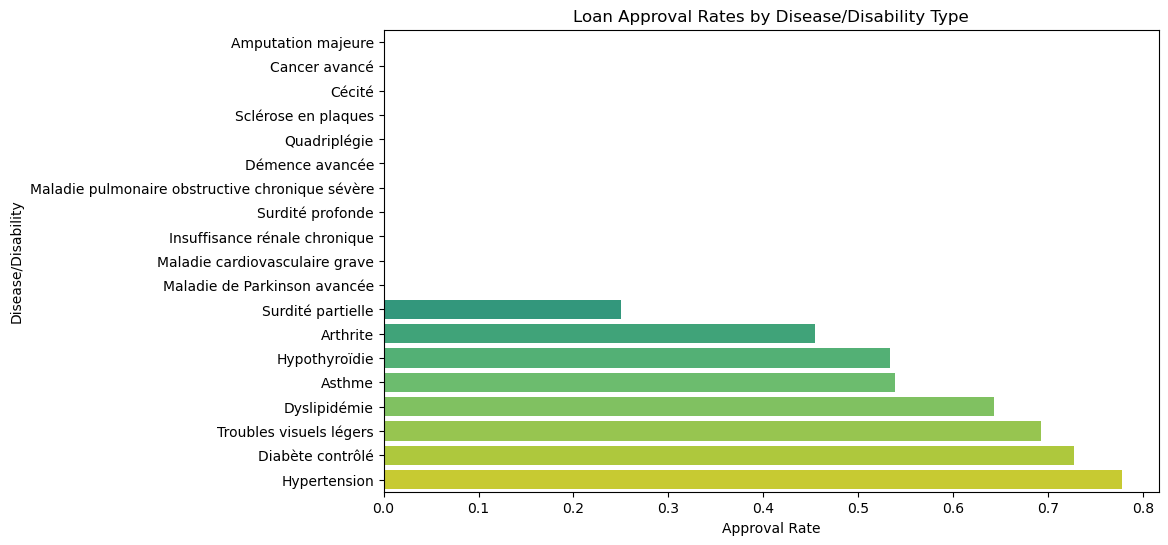

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where 'Disease/Disability' is not '-'
data_with_disease = data[data['Disease/Disability'] != '-']

# Calculate loan approval rates for each unique type of disease/disability
approval_rates_by_disease = data_with_disease.groupby('Disease/Disability')['LOAN_APPROVED'].mean().sort_values()

# Print the loan approval rates for each disease/disability type
print("Loan Approval Rates by Disease/Disability Type:")
for disease, rate in approval_rates_by_disease.items():
    print(f"{disease}: {rate:.2f}")

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=approval_rates_by_disease.values, y=approval_rates_by_disease.index, palette='viridis')
plt.title('Loan Approval Rates by Disease/Disability Type')
plt.xlabel('Approval Rate')
plt.ylabel('Disease/Disability')
plt.show()


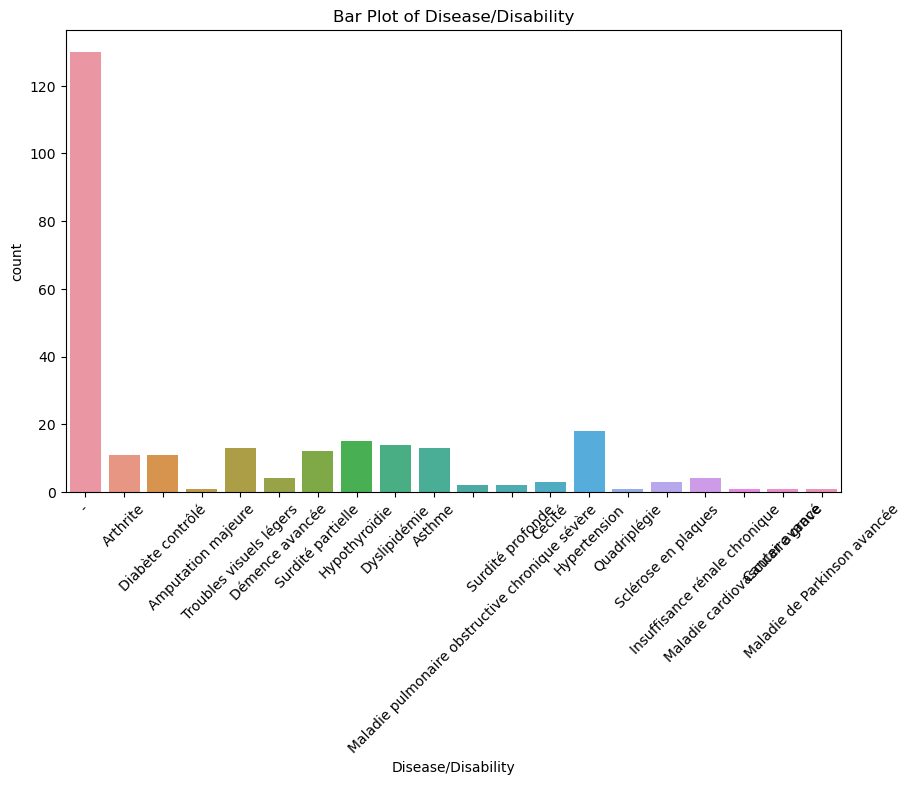

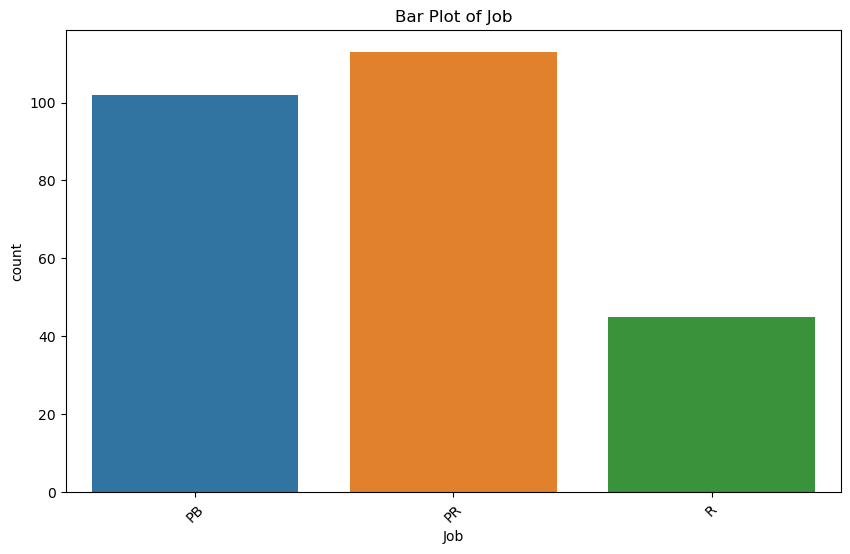

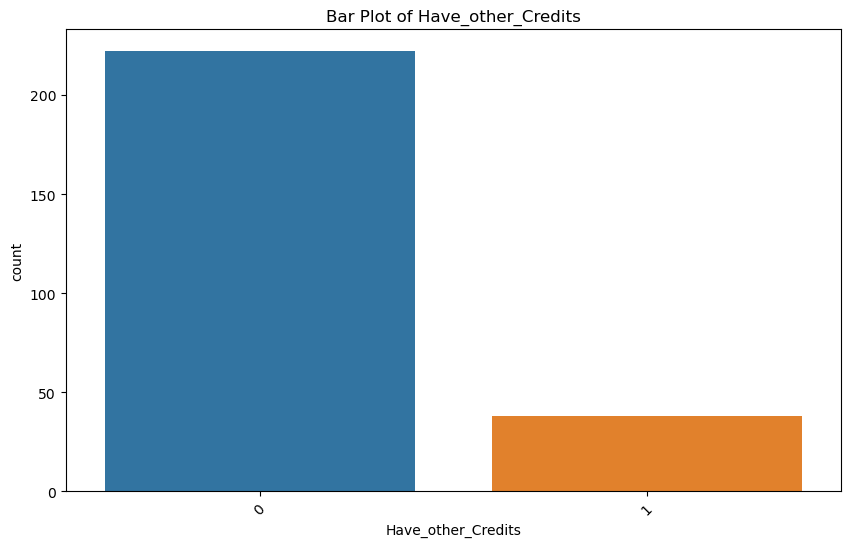

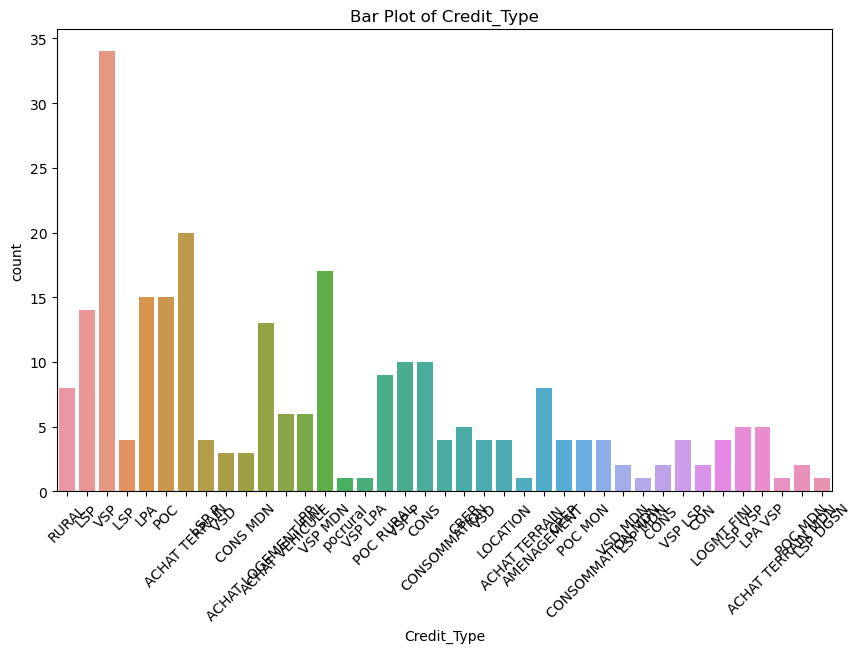

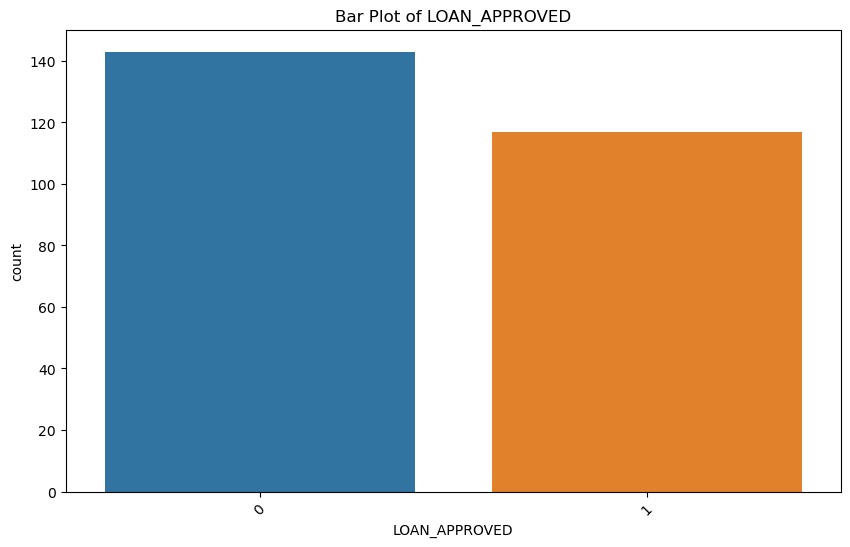

In [132]:
# Bar plots for categorical features
categorical_features = ['Disease/Disability', 'Job', 'Have_other_Credits', 'Credit_Type', 'LOAN_APPROVED']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature)
    plt.title(f"Bar Plot of {feature}")
    plt.xticks(rotation=45)
    plt.show()


In [133]:
# Columns to be one-hot encoded
categorical_cols = ['Credit_Type', 'Disease/Disability', 'Job']

# Apply one-hot encoding
encoded_data = pd.get_dummies(data, columns=categorical_cols)

# Optionally, drop the original columns if you don't need them anymore
data = data.drop(categorical_cols, axis=1)
data = pd.concat([data, encoded_data], axis=1)

# Saving the DataFrame to a new CSV file (optional)
encoded_data.to_csv('encoded_data.csv', index=False)

# Display the first few rows of the dataframe to confirm changes
print(encoded_data.head())

        Age    Salary  Have_other_Credits  Requested_Credit  LOAN_APPROVED  \
0 -0.873827  2.474997                   0         -0.421860              1   
1 -0.288136 -1.139105                   0         -0.738953              0   
3 -0.873827  0.733813                   0          0.596690              1   
4  1.309204  0.665082                   0          1.992345              0   
5  0.510534  0.988117                   1         -0.755701              0   

  Disability_Status  Credit_Type_ACHAT LOGEMENT FINI  \
0     No Disability                            False   
1   With Disability                            False   
3   With Disability                            False   
4   With Disability                            False   
5   With Disability                            False   

   Credit_Type_ACHAT TERRAIN  Credit_Type_ACHAT TERRAIN   \
0                      False                       False   
1                      False                       False   
3             

Index(['Age', 'Salary', 'Have_other_Credits', 'Requested_Credit',
       'LOAN_APPROVED', 'Disability_Status', 'Credit_Type_ACHAT LOGEMENT FINI',
       'Credit_Type_ACHAT TERRAIN', 'Credit_Type_ACHAT TERRAIN ',
       'Credit_Type_ACHAT TERRAIN MDN', 'Credit_Type_ACHAT VEHICULE',
       'Credit_Type_AMENAGEMENT', 'Credit_Type_CBEP', 'Credit_Type_CON',
       'Credit_Type_CONS', 'Credit_Type_CONS ', 'Credit_Type_CONS MDN',
       'Credit_Type_CONSOMMATION', 'Credit_Type_CONSOMMATION MDN',
       'Credit_Type_CPEP', 'Credit_Type_LOCATION', 'Credit_Type_LOGMT FINI',
       'Credit_Type_LPA', 'Credit_Type_LPA VSP', 'Credit_Type_LPP',
       'Credit_Type_LSP', 'Credit_Type_LSP ', 'Credit_Type_LSP DGSN',
       'Credit_Type_LSP MDN', 'Credit_Type_LSP P', 'Credit_Type_LSP VSP',
       'Credit_Type_POC', 'Credit_Type_POC MDN', 'Credit_Type_POC MON',
       'Credit_Type_POC RURAL', 'Credit_Type_RURAL', 'Credit_Type_VSD',
       'Credit_Type_VSD ', 'Credit_Type_VSD MDN', 'Credit_Type_VSP',
    

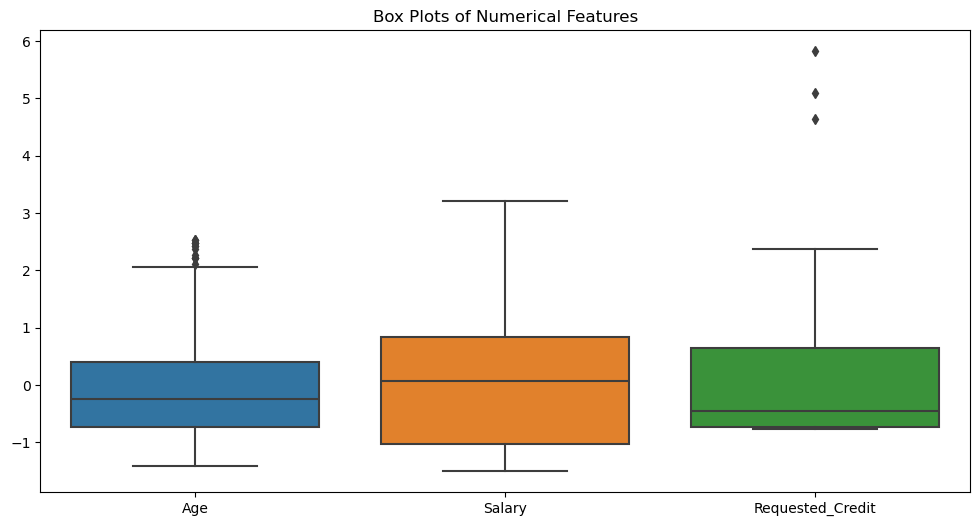

In [134]:
# Remove duplicate columns by keeping the first occurrence
data = encoded_data.loc[:, ~encoded_data.columns.duplicated()]

# Verify that duplicates are removed by printing the columns again
print(data.columns)
# Define numerical features
numerical_features = ['Age', 'Salary', 'Requested_Credit']

# Check the data types of these features
print(data[numerical_features].dtypes)

# Convert all numerical features to float and handle non-numeric values
for col in numerical_features:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill any remaining missing values with the median of the column
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())

# Confirm that all data types are now numeric
print(data[numerical_features].dtypes)
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_features])
plt.title("Box Plots of Numerical Features")
plt.show()


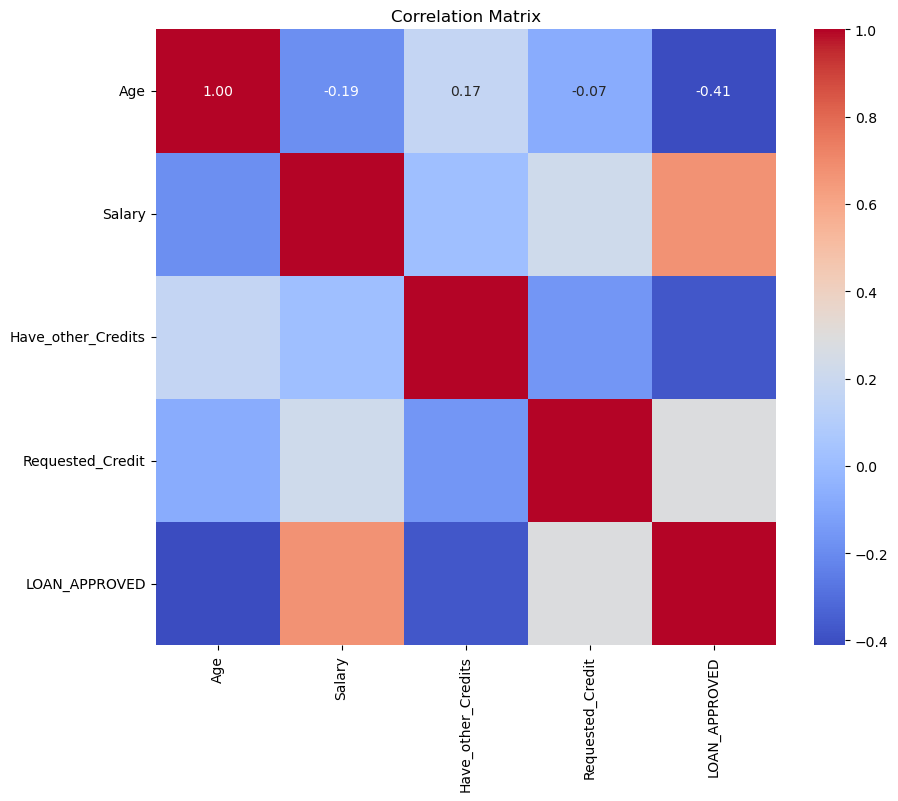

In [135]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [136]:
# Print data types to check if there are any unexpected non-numeric types
print(data.dtypes)

# Optionally, you can print the head of the DataFrame to see the data
print(data.head())

Age                                           float64
Salary                                        float64
Have_other_Credits                              int64
Requested_Credit                              float64
LOAN_APPROVED                                   int64
                                               ...   
Disease/Disability_Surdité profonde              bool
Disease/Disability_Troubles visuels légers       bool
Job_PB                                           bool
Job_PR                                           bool
Job_R                                            bool
Length: 68, dtype: object
        Age    Salary  Have_other_Credits  Requested_Credit  LOAN_APPROVED  \
0 -0.873827  2.474997                   0         -0.421860              1   
1 -0.288136 -1.139105                   0         -0.738953              0   
3 -0.873827  0.733813                   0          0.596690              1   
4  1.309204  0.665082                   0          1.992345         

In [137]:
# Calculate the Debt-to-Income (DTI) ratio
data['DTI_Ratio'] = data['Requested_Credit'] / data['Salary']
# One-hot encode the 'Disability_Status' column
data = pd.get_dummies(data, columns=['Disability_Status'])
# Display the first few rows of the updated dataframe
print(data.head())

        Age    Salary  Have_other_Credits  Requested_Credit  LOAN_APPROVED  \
0 -0.873827  2.474997                   0         -0.421860              1   
1 -0.288136 -1.139105                   0         -0.738953              0   
3 -0.873827  0.733813                   0          0.596690              1   
4  1.309204  0.665082                   0          1.992345              0   
5  0.510534  0.988117                   1         -0.755701              0   

   Credit_Type_ACHAT LOGEMENT FINI  Credit_Type_ACHAT TERRAIN  \
0                            False                      False   
1                            False                      False   
3                            False                      False   
4                            False                      False   
5                            False                      False   

   Credit_Type_ACHAT TERRAIN   Credit_Type_ACHAT TERRAIN MDN  \
0                       False                          False   
1           

In [138]:
print(data.head())

        Age    Salary  Have_other_Credits  Requested_Credit  LOAN_APPROVED  \
0 -0.873827  2.474997                   0         -0.421860              1   
1 -0.288136 -1.139105                   0         -0.738953              0   
3 -0.873827  0.733813                   0          0.596690              1   
4  1.309204  0.665082                   0          1.992345              0   
5  0.510534  0.988117                   1         -0.755701              0   

   Credit_Type_ACHAT LOGEMENT FINI  Credit_Type_ACHAT TERRAIN  \
0                            False                      False   
1                            False                      False   
3                            False                      False   
4                            False                      False   
5                            False                      False   

   Credit_Type_ACHAT TERRAIN   Credit_Type_ACHAT TERRAIN MDN  \
0                       False                          False   
1           

In [139]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, classification_report

def evaluate_model(model, X_train, X_test, y_train, y_test, verbose=False):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Check if model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = None

    # Calculate metrics
    results = {
        "train_accuracy": accuracy_score(y_train, y_train_pred),
        "test_accuracy": accuracy_score(y_test, y_test_pred),
        "roc_auc": roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A',
        "precision": precision_score(y_test, y_test_pred, zero_division=0),
        "recall": recall_score(y_test, y_test_pred, zero_division=0),
        "f1": f1_score(y_test, y_test_pred, zero_division=0)
    }
        # Optionally print detailed classification report for test data
    print(classification_report(y_test, y_test_pred))

    return results



In [140]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame

# Selecting features to scale
features_to_scale = ['Age', 'Salary', 'Requested_Credit', 'DTI_Ratio']

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Scale the features
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Assuming 'data' is your DataFrame and has been properly defined
X = data.drop(columns=['LOAN_APPROVED'])
y = data['LOAN_APPROVED']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.96      0.88      0.92        25

    accuracy                           0.92        52
   macro avg       0.93      0.92      0.92        52
weighted avg       0.93      0.92      0.92        52

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.96      1.00      0.98        25

    accuracy                           0.98        52
   macro avg       0.98      0.98      0.98        52
weighted avg       0.98      0.98      0.98        52

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.96      1.00      0.98        25

    accuracy                           0.98        52
   macro avg       0.98      0.98      0.98        52
weighted avg       0.98      0.98      0.98        52

              preci

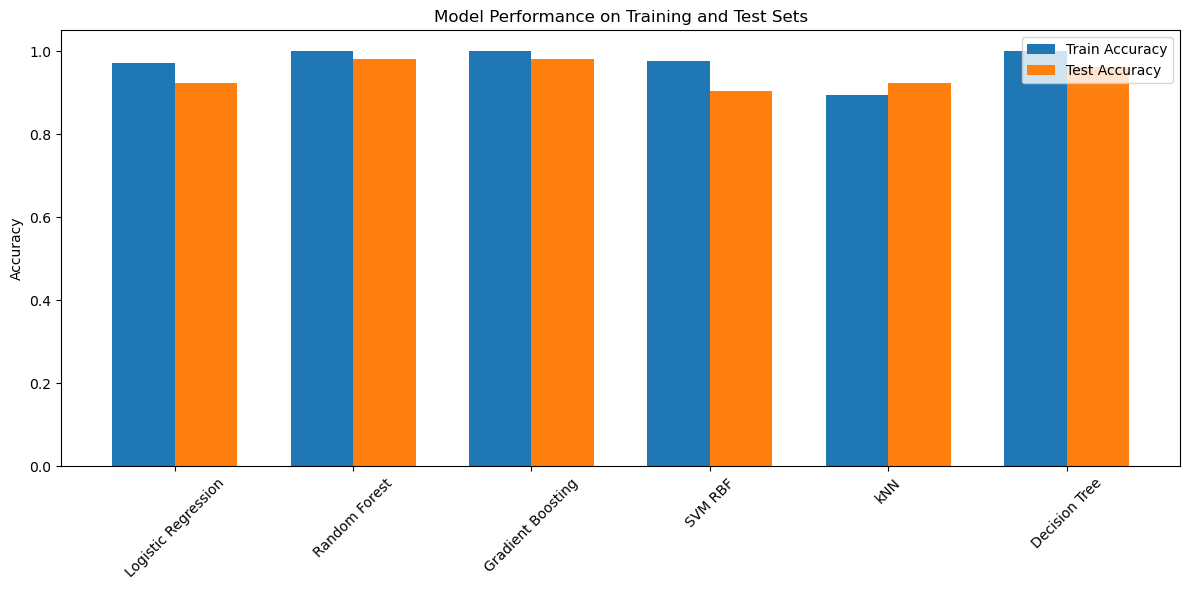

In [141]:
from sklearn.tree import DecisionTreeClassifier

# Models setup
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM RBF": SVC(kernel='rbf', probability=True, random_state=42),
    "kNN": KNeighborsClassifier(n_neighbors=6),
    "Decision Tree":DecisionTreeClassifier(random_state=42)
}

# Data for evaluation
results = []

# Evaluate each model and store results
for name, model in models.items():
    model_results = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append([name] + list(model_results.values()))

# Create a DataFrame to display results
columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1 Score']
results_df = pd.DataFrame(results, columns=columns)
print(results_df)

# Plotting train and test accuracies side by side
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

model_names = [result[0] for result in results]
train_accs = [result[1] for result in results]
test_accs = [result[2] for result in results]

rects1 = ax.bar(x - width/2, train_accs, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, test_accs, width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Model Performance on Training and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Processing Logistic Regression...


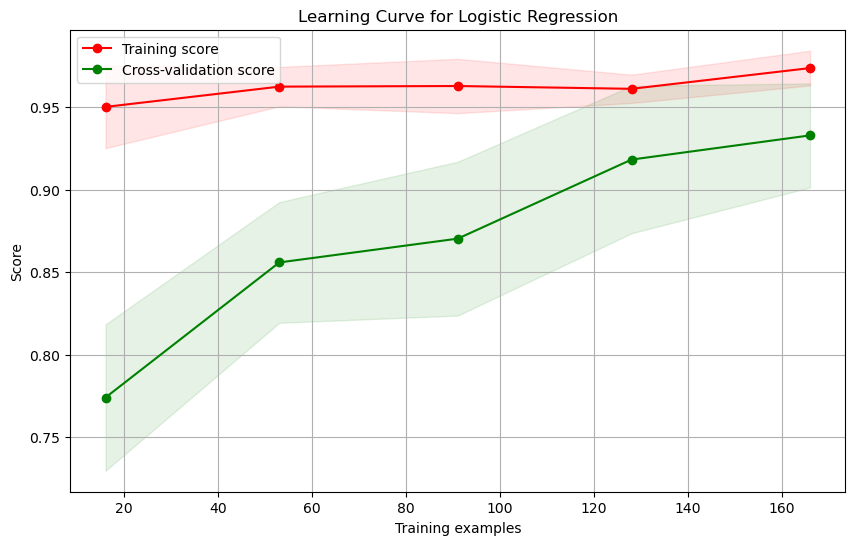

Processing Random Forest...


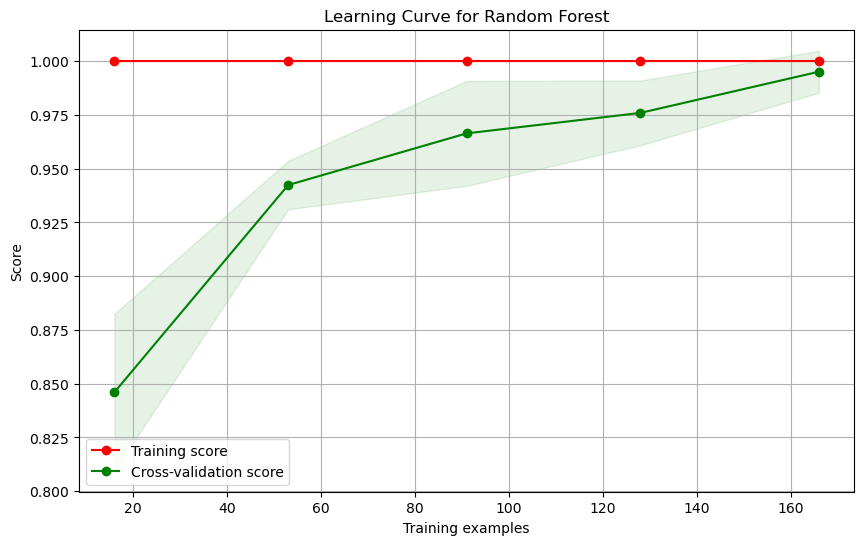

Processing Gradient Boosting...


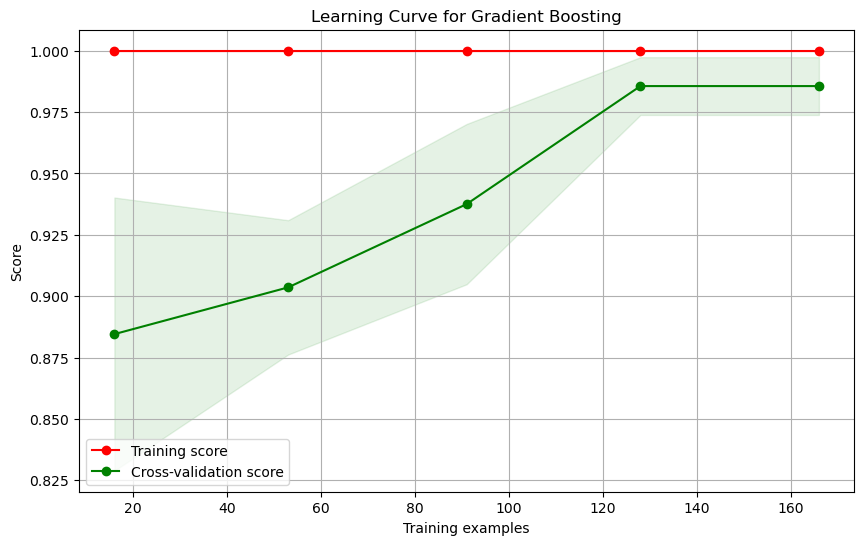

Processing SVM RBF...


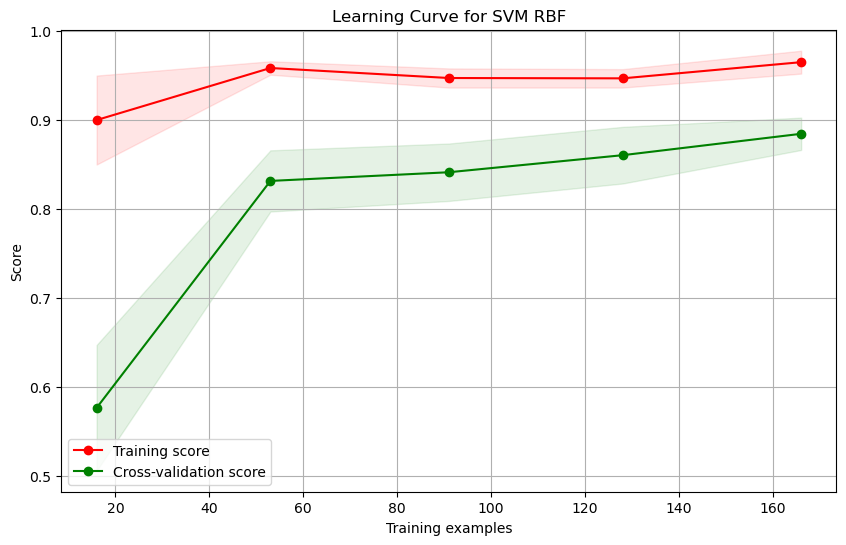

Processing kNN...


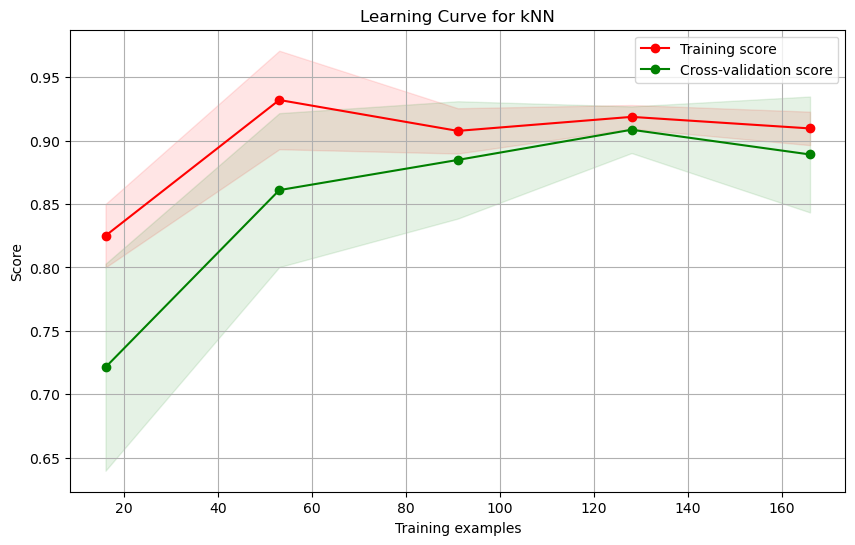

Processing Decision Tree...


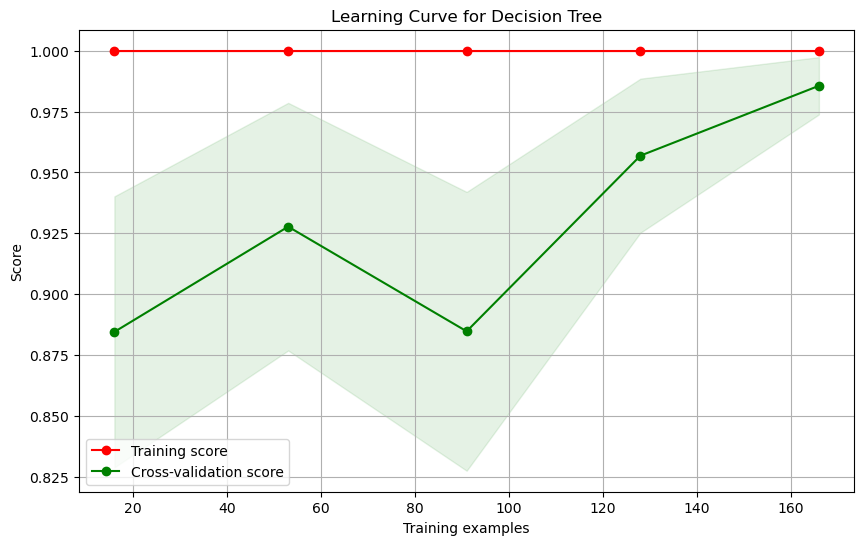

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Generate plots for the test and training learning curve.

    Parameters:
        estimator : estimator instance, implementing 'fit' and 'predict'
        title : str, title for the chart
        X : array-like, shape (n_samples, n_features), training vector
        y : array-like, shape (n_samples) or (n_samples, n_features), target relative to X
        cv : int, cross-validation generator or an iterable, optional
        n_jobs : int or None, optional (default=None), number of jobs to run in parallel
        train_sizes : array-like, shape (n_ticks,), dtype float or int, relative or absolute numbers of training examples
    """
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="accuracy")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, color="r", alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, color="g", alpha=0.1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Models setup
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM RBF": SVC(kernel='rbf', probability=True, random_state=42),
    "kNN": KNeighborsClassifier(n_neighbors=6),
    "Decision Tree":DecisionTreeClassifier(random_state=42)
}

# Assuming 'data' is your DataFrame and has been properly defined
X = data.drop(columns=['LOAN_APPROVED'])
y = data['LOAN_APPROVED']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model and plot learning curves
for name, model in models.items():
    print(f"Processing {name}...")
    plot_learning_curve(model, f"Learning Curve for {name}", X_train, y_train, cv=5, n_jobs=-1)


In [148]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Define the min and max values for normalization
min_max_values = {
    'Age': [18, 70],  # Example values, replace with actual min and max
    'Salary': [20000, 200000],  # Example values, replace with actual min and max
    'Requested_Credit': [50000, 50000000],  # Example values, replace with actual min and max
    'DTI_Ratio': [2.5, 250]
}

def encode_new_instance(new_instance, min_max_values):
    # Initialize the encoded instance list
    encoded_instance = []
    
    # Normalize numerical features
    encoded_instance.append((float(new_instance['Age']) - min_max_values['Age'][0]) / (min_max_values['Age'][1] - min_max_values['Age'][0]))
    encoded_instance.append((float(new_instance['Salary'].replace(' DA', '').replace(' ', '').replace(',', '.')) - min_max_values['Salary'][0]) / (min_max_values['Salary'][1] - min_max_values['Salary'][0]))
    encoded_instance.append(float(new_instance['Have_other_Credits']))
    encoded_instance.append((float(new_instance['Requested_Credit'].replace(' DA', '').replace(' ', '').replace(',', '.')) - min_max_values['Requested_Credit'][0]) / (min_max_values['Requested_Credit'][1] - min_max_values['Requested_Credit'][0]))
    encoded_instance.append((float(new_instance['DTI_Ratio'])- min_max_values['DTI_Ratio'][0]) / (min_max_values['DTI_Ratio'][1] - min_max_values['DTI_Ratio'][0]))
    
    # One-hot encode Credit_Type
    credit_types = [
        'ACHAT LOGEMENT FINI', 'ACHAT TERRAIN', 'ACHAT TERRAIN ', 'ACHAT TERRAIN MDN', 'ACHAT VEHICULE', 'AMENAGEMENT',
        'CBEP', 'CON', 'CONS', 'CONS ', 'CONS MDN', 'CONSOMMATION', 'CONSOMMATION MDN', 'CPEP', 'LOCATION',
        'LOGMT FINI', 'LPA', 'LPA VSP', 'LPP', 'LSP', 'LSP ', 'LSP DGSN', 'LSP MDN', 'LSP P', 'LSP VSP', 'POC', 'POC MDN',
        'POC MON', 'POC RURAL', 'RURAL', 'VSD', 'VSD ', 'VSD MDN', 'VSP', 'VSP LPA', 'VSP LSP', 'VSP MDN', 'VSP P', 'pocrural'
    ]
    for ct in credit_types:
        encoded_instance.append(1 if new_instance['Credit_Type'] == ct else 0)
    
    # One-hot encode Disease/Disability
    diseases = [
        '-', 'Amputation majeure', 'Arthrite', 'Asthme', 'Cancer avancé', 'Cécité', 'Diabète contrôlé', 'Dyslipidémie',
        'Démence avancée', 'Hypertension', 'Hypothyroïdie', 'Insuffisance rénale chronique', 'Maladie cardiovasculaire grave',
        'Maladie de Parkinson avancée', 'Maladie pulmonaire obstructive chronique sévère', 'Quadriplégie', 'Sclérose en plaques',
        'Surdité partielle', 'Surdité profonde', 'Troubles visuels légers'
    ]
    for disease in diseases:
        encoded_instance.append(1 if new_instance['Disease/Disability'] == disease else 0)
    
    # One-hot encode Job
    jobs = ['PB', 'PR', 'R']
    for job in jobs:
        encoded_instance.append(1 if new_instance['Job'] == job else 0)
    
    # Encode Disability Status
    encoded_instance.append(1 if new_instance['Disability_Status_With Disability'] else 0)
    encoded_instance.append(0 if new_instance['Disability_Status_With Disability'] else 1)
    
    return np.array(encoded_instance).reshape(1, -1)

# Define the new instance dictionary
new_instance_dict = {
    'Age': '33',
    'Disease/Disability': '-',
    'Salary': '84 800,00 DA',
    'Job': 'PB',
    'Have_other_Credits': '0',
    'Requested_Credit': '1 351 000,00 DA',
    'Credit_Type': 'RURAL',
    'DTI_Ratio': '0.648714',
    'Disability_Status_With Disability': False
}

new_instance_dict_1 = {
    'Age': '73',
    'Disease/Disability': 'Surdité profonde',
    'Salary': '50 000,00 DA',
    'Job': 'R',
    'Have_other_Credits': '0',
    'Requested_Credit': '1 351 000,00 DA',
    'Credit_Type': 'RURAL',
    'DTI_Ratio': '27.02',
    'Disability_Status_With Disability': False
}

# Encode the new instance
encoded_instance = encode_new_instance(new_instance_dict, min_max_values)
encoded_instance_1 = encode_new_instance(new_instance_dict_1, min_max_values)

print(encoded_instance)


[[ 0.28846154  0.36        0.          0.02604605 -0.00747994  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          1.        ]]


In [154]:
import joblib

loan_model = GradientBoostingClassifier()
loan_model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(loan_model, 'GB_loan_approval_model.pkl')

['GB_loan_approval_model.pkl']

In [165]:
import joblib

# Load the model from the file
loaded_model = joblib.load('GB_loan_approval_model.pkl')

# Get the probability of the positive class (class 1)
probability = loaded_model.predict_proba(encoded_instance)[0][1]
probability_1 = loaded_model.predict_proba(encoded_instance_1)[0][1]

print(f"Probability of acceptance: {probability * 100:.2f}%")
print(f"Probability of acceptance: {probability_1 * 100:.2f}%")

Probability of acceptance: 99.83%
Probability of acceptance: 73.26%


X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


In [159]:
# Define feature names
feature_names = [
    'Age', 'Salary', 'Have_other_Credits', 'Requested_Credit', 'DTI_Ratio'
] + [
    'Credit_Type_' + ct for ct in [
        'ACHAT LOGEMENT FINI', 'ACHAT TERRAIN', 'ACHAT TERRAIN ', 'ACHAT TERRAIN MDN', 'ACHAT VEHICULE', 'AMENAGEMENT',
        'CBEP', 'CON', 'CONS', 'CONS ', 'CONS MDN', 'CONSOMMATION', 'CONSOMMATION MDN', 'CPEP', 'LOCATION',
        'LOGMT FINI', 'LPA', 'LPA VSP', 'LPP', 'LSP', 'LSP ', 'LSP DGSN', 'LSP MDN', 'LSP P', 'LSP VSP', 'POC', 'POC MDN',
        'POC MON', 'POC RURAL', 'RURAL', 'VSD', 'VSD ', 'VSD MDN', 'VSP', 'VSP LPA', 'VSP LSP', 'VSP MDN', 'VSP P', 'pocrural'
    ]
] + [
    'Disease/Disability_' + d for d in [
        '-', 'Amputation majeure', 'Arthrite', 'Asthme', 'Cancer avancé', 'Cécité', 'Diabète contrôlé', 'Dyslipidémie',
        'Démence avancée', 'Hypertension', 'Hypothyroïdie', 'Insuffisance rénale chronique', 'Maladie cardiovasculaire grave',
        'Maladie de Parkinson avancée', 'Maladie pulmonaire obstructive chronique sévère', 'Quadriplégie', 'Sclérose en plaques',
        'Surdité partielle', 'Surdité profonde', 'Troubles visuels légers'
    ]
] + [
    'Job_' + j for j in ['PB', 'PR', 'R']
] + [
    'Disability_Status_With Disability', 'Disability_Status_No Disability'
]

# Load the trained Random Forest model
loaded_model = joblib.load('DT_loan_approval_model.pkl')

# Create a SHAP explainer
explainer = shap.TreeExplainer(loaded_model)

# Calculate SHAP values
shap_values = explainer.shap_values(encoded_instance)

# Visualize the SHAP values with real feature names
shap.initjs()  # Initialize the JS visualization

# Assuming a binary classification model (two classes)
shap.force_plot(explainer.expected_value[0], shap_values[0], encoded_instance, feature_names=feature_names,)

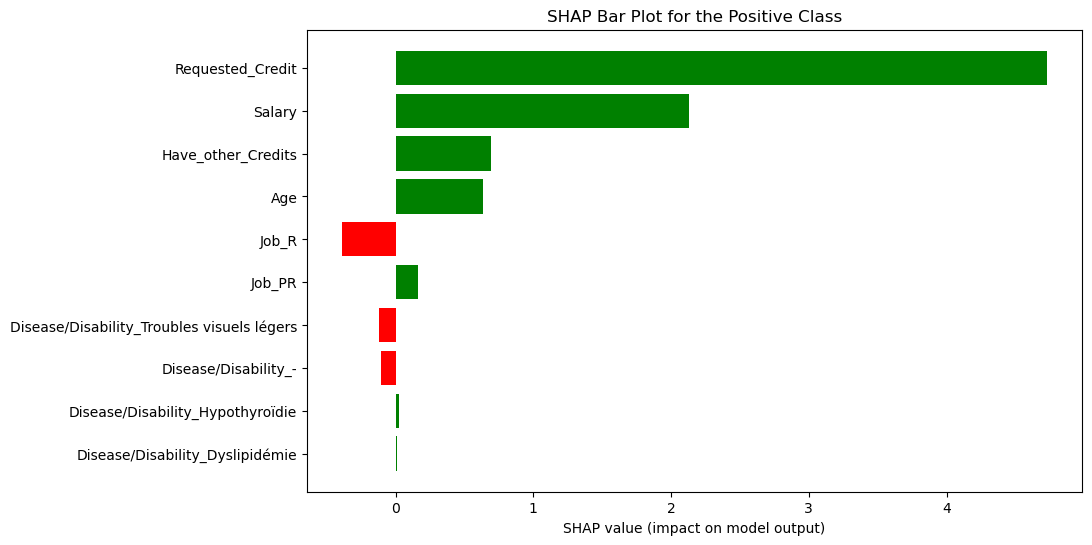

In [161]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have shap_values and feature_names defined
# Extract SHAP values for the positive class
shap_values_positive = shap_values[0]

# Get the feature importance values and their indices
shap_values_importance = np.abs(shap_values_positive)
sorted_indices = np.argsort(shap_values_importance)[-10:]

# Get the feature names and SHAP values for the top features
top_features = [feature_names[i] for i in sorted_indices]
top_shap_values = shap_values_positive[sorted_indices]

# Create the bar plot with custom colors
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(top_features)), top_shap_values, color=['green' if val > 0 else 'red' for val in top_shap_values])
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('SHAP value (impact on model output)')
plt.title('SHAP Bar Plot for the Positive Class')

plt.show()
